In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


1. Import the data

In [3]:
rw = pd.read_csv("winequality-red.csv", delimiter=";")
rw.columns = rw.columns.str.replace(" ", "_")
rw.head(5)



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
ww = pd.read_csv("winequality-white.csv", delimiter=";")
ww.columns = ww.columns.str.replace(" ", "_")
ww.head(5)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
rwHq=rw.loc[rw['quality']>=7]
rwLq=rw.loc[rw['quality']<6]
rwHq=rwHq.iloc[:,:-1]
rwLq=rwLq.iloc[:,:-1]

2. Min-Max Standardlization

In [32]:

rwHqT = (rwHq-rwHq.min())/(rwHq.max()-rwHq.min())
rwLqT = (rwLq-rwLq.min())/(rwLq.max()-rwLq.min())
rwT = (rw-rw.min())/(rw.max()-rw.min())
rwT=rwT.iloc[:,:-1]


In [33]:
rwT

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


In [51]:
rwMean = rwT.mean().to_dict()
rwHigh = rwHqT.mean().to_dict()


3. Plot a radar chart to compare the mean values between high quality red wine and all red wine. 

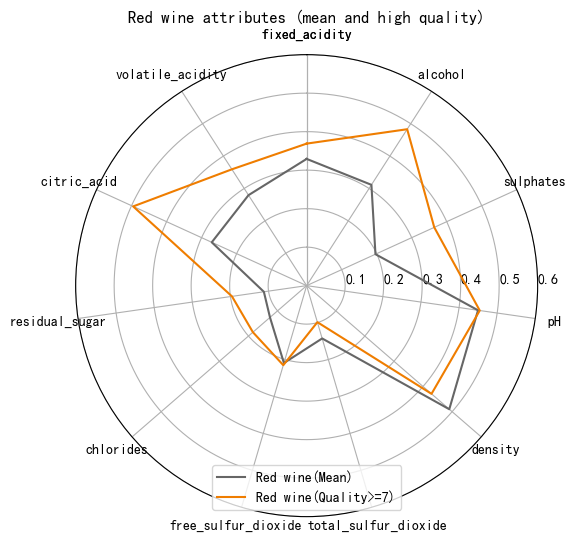

In [68]:
results=[]
results.append(rwMean)
results.append(rwHigh)
data_length = len(results[0])
angles = np.linspace(0, 2*np.pi, data_length, endpoint=False)
labels = [key for key in results[0].keys()]
score = [[v for v in result.values()] for result in results]
score_a = np.concatenate((score[0], [score[0][0]]))
score_b = np.concatenate((score[1], [score[1][0]]))
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((labels, [labels[0]]))
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.subplot(111, polar=True)
ax.plot(angles, score_a, color='#666666')
ax.plot(angles, score_b, color='#EF7D00')
ax.set_thetagrids(angles*180/np.pi, labels)
ax.set_theta_zero_location('N')
ax.set_rlim(0, 0.6)
ax.set_rlabel_position(270)
ax.set_title("Red wine attributes (mean and high quality)")
plt.legend(["Red wine(Mean)", "Red wine(Quality>=7)"], loc='lower center')
plt.show()


In [74]:
rw.mean()

fixed_acidity            8.319637
volatile_acidity         0.527821
citric_acid              0.270976
residual_sugar           2.538806
chlorides                0.087467
free_sulfur_dioxide     15.874922
total_sulfur_dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [75]:
rwHq.mean()

fixed_acidity            8.847005
volatile_acidity         0.405530
citric_acid              0.376498
residual_sugar           2.708756
chlorides                0.075912
free_sulfur_dioxide     13.981567
total_sulfur_dioxide    34.889401
density                  0.996030
pH                       3.288802
sulphates                0.743456
alcohol                 11.518049
dtype: float64

4. Same as the red wine, plot the radar chart for white wine.

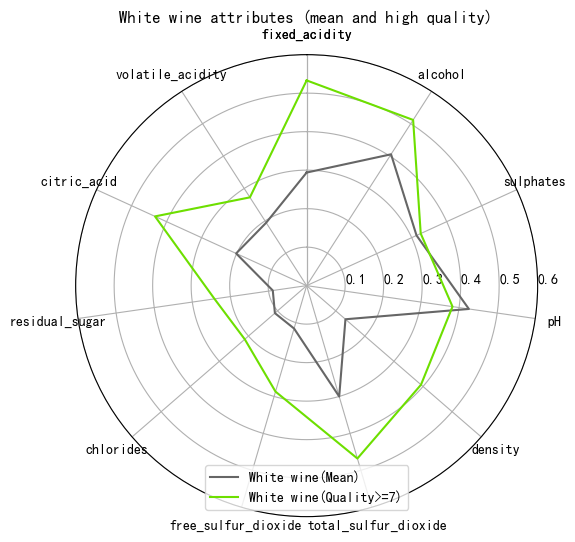

In [73]:
wwHq=ww.loc[ww['quality']>=7]
wwLq=ww.loc[ww['quality']<6]
wwHq=wwHq.iloc[:,:-1]
wwLq=wwLq.iloc[:,:-1]
wwHqT = (wwHq-wwHq.min())/(wwHq.max()-wwHq.min())
wwLqT = (wwLq-wwLq.min())/(wwLq.max()-wwLq.min())
wwT = (ww-ww.min())/(ww.max()-ww.min())
wwT=wwT.iloc[:,:-1]
wwMean = wwT.mean().to_dict()
wwHigh = wwHqT.mean().to_dict()

results = []
results.append(wwMean)
results.append(wwHigh)
data_length = len(results[0])
angles = np.linspace(0, 2*np.pi, data_length, endpoint=False)
labels = [key for key in results[0].keys()]
score = [[v for v in result.values()] for result in results]
score_a = np.concatenate((score[0], [score[0][0]]))
score_b = np.concatenate((score[1], [score[1][0]]))
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((labels, [labels[0]]))
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.subplot(111, polar=True)
ax.plot(angles, score_a, color='#666666')
ax.plot(angles, score_b, color='#6DDF00')
ax.set_thetagrids(angles*180/np.pi, labels)
ax.set_theta_zero_location('N')
ax.set_rlim(0, 0.6)
ax.set_rlabel_position(270)
ax.set_title("White wine attributes (mean and high quality)")
plt.legend(["White wine(Mean)", "White wine(Quality>=7)"], loc='lower center')
plt.show()
